In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
x = np.random.normal(0, 0.25, 200)
y = np.random.normal(0, 0.15, 200)
z = np.random.normal(0, 0.01, 200)
data = np.stack((x, y, z), axis=1)

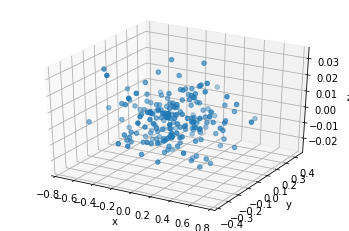

In [3]:
fig=plt.figure()
axes = plt.axes(projection='3d')
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")
axes.scatter3D(x,y,z)

In [4]:
# subtract mean from columns
centered = data - np.mean(data.T, axis=1)

# find covariance matrix
cov = np.cov(centered.T)

# find eigenvalues and eigenvectors
w, v = np.linalg.eig(cov)

In [5]:
# find % variance explained by each eigenvector
w /= np.sum(w)
w

array([0.74302667, 0.25567816, 0.00129517])

In [6]:
# project the original in terms of the eigenvectors
final_data = v.T.dot(centered.T)

# given the first two features account for most of the variance we can maintain almost all information without the z axis
final_data = final_data[0:2,:]

# head of dataset
final_data.T[0:10]

array([[-0.2650908 , -0.03358213],
       [-0.27666683,  0.1550476 ],
       [-0.44000334, -0.27343466],
       [ 0.18387888,  0.1881438 ],
       [ 0.16548982, -0.016185  ],
       [ 0.10629084,  0.1584413 ],
       [-0.17575862,  0.18949961],
       [ 0.2288413 ,  0.02552705],
       [ 0.00549963, -0.17387887],
       [ 0.0530543 ,  0.14006329]])